<h2><center> Welcome to the UmojaHack Africa 2023 Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [352]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [353]:
# Load files
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test.csv')
samplesubmission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SampleSubmission.csv')

# Preview train dataset
train

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,ID_XJWM9B7X4L,26.769658,6965.281426,25.0,0.155955,1.497184,0.000000,252.525113,589.072219,0.858386,0.758573,0.019962,0.0,1177.825039,30.875026,1
8904,ID_YIC5VRPLUD,0.000000,0.000000,27.0,0.000000,0.400009,0.000000,28.089513,27.267273,0.400009,0.355563,0.000000,0.0,221.249363,23.503856,0
8905,ID_T3RF72SEG1,0.866827,853.957842,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,0.355621,0.022226,0.0,262.270699,21.060478,0
8906,ID_2AUQFJYWKV,0.044430,16.527885,28.0,0.000000,0.888596,0.000000,74.375484,116.650437,0.555372,0.377653,0.000000,0.0,268.222697,24.775056,0


In [354]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [355]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


In [356]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [357]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [358]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [359]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [360]:
total_time = train['Time on processor'].sum()
train['I/O Operation/Byte'] = train['I/O Data Operations'] / train[' I/O Data Bytes']
train['CPU Utilisation'] = train['Time on processor'] / total_time
train['Disk Usage'] = train['Disc Writing/sec'] + train['Disk Reading/sec']
train['I/O Bytes per Subprocess'] = train[' I/O Data Bytes']/train['Number of subprocesses']
train['Page Fault rate'] = train['Pages Read/sec'] / train['Page Errors/sec']
train['Network Activity'] =  train['Bytes Sent/sent'] + train['Received Bytes (HTTP)'] + train['Network packets sent'] +  train['Network packets received']


In [361]:
tot_time = test['Time on processor'].sum()
test['I/O Operation/Byte'] = test['I/O Data Operations'] / test[' I/O Data Bytes']
test['CPU Utilisation'] = test['Time on processor'] / tot_time
test['Disk Usage'] = test['Disc Writing/sec'] + test['Disk Reading/sec']
test['I/O Bytes per Subprocess'] = test[' I/O Data Bytes']/test['Number of subprocesses']
test['Page Fault rate'] = test['Pages Read/sec'] / test['Page Errors/sec']
test['Network Activity'] =  test['Bytes Sent/sent'] + test['Received Bytes (HTTP)'] + test['Network packets sent'] +  test['Network packets received']



In [362]:
data_impute = train.replace(r'^\s*$', np.nan, regex=True)

In [363]:
data_impute['I/O Operation/Byte'].dtypes

dtype('float64')

In [364]:
pd.DataFrame(data_impute.isnull().sum(), columns = ["Number of missing values"])

,Number of missing values
ID,0
I/O Data Operations,0
I/O Data Bytes,0
Number of subprocesses,0
Time on processor,0
Disk Reading/sec,0
Disc Writing/sec,0
Bytes Sent/sent,0
Received Bytes (HTTP),0
Network packets sent,0


In [365]:
operation = 'I/O Operation/Byte'
data_impute['I/O Operation/Byte'].fillna(data_impute['I/O Operation/Byte'].mean(), inplace=True)
test['I/O Operation/Byte'].fillna(data_impute['I/O Operation/Byte'].mean(), inplace=True)

In [366]:
pd.DataFrame(data_impute.isnull().sum(), columns = ["Number of missing values"])

,Number of missing values
ID,0
I/O Data Operations,0
I/O Data Bytes,0
Number of subprocesses,0
Time on processor,0
Disk Reading/sec,0
Disc Writing/sec,0
Bytes Sent/sent,0
Received Bytes (HTTP),0
Network packets sent,0


In [367]:
#
data_impute[' I/O Data Bytes']

0         3790.450939
1         5182.451722
2          120.821253
3       127228.251100
4         1091.620117
            ...      
8903      6965.281426
8904         0.000000
8905       853.957842
8906        16.527885
8907       192.706713
Name:  I/O Data Bytes, Length: 8908, dtype: float64

In [368]:
pd.DataFrame(data_impute.nunique(), columns = ["Number of unique values"])

,Number of unique values
ID,8908
I/O Data Operations,6001
I/O Data Bytes,5977
Number of subprocesses,36
Time on processor,3702
Disk Reading/sec,7397
Disc Writing/sec,2144
Bytes Sent/sent,7397
Received Bytes (HTTP),7397
Network packets sent,7395


In [369]:
data_impute.tail(100)

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,...,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label,I/O Operation/Byte,CPU Utilisation,Disk Usage,I/O Bytes per Subprocess,Page Fault rate,Network Activity
8808,ID_MSSR1VV640,0.000000,0.000000,27.0,0.000000,1.977770,0.000000,67.088633,232.532448,0.599998,...,0.0,363.731948,28.412099,0,0.003149,0.000000,1.977770,0.000000,0.000000,300.865521
8809,ID_BP400C6X3E,0.777773,886.593999,29.0,0.000000,7.444394,0.022222,51.088543,28.933137,0.599996,...,0.0,655.795561,27.156612,0,0.000877,0.000000,7.466616,30.572207,0.000136,81.021674
8810,ID_Y4KNX6GC9G,5.332580,1101.311086,29.0,0.104152,2.932919,0.000000,95.719811,153.711619,1.044297,...,0.0,298.069003,23.662679,0,0.004842,0.000024,2.932919,37.976244,0.000075,251.431147
8811,ID_P6LWKO0KLK,1.044783,249.591892,29.0,0.000000,2.934283,0.000000,131.820442,197.730662,1.711665,...,0.0,383.946487,26.396318,0,0.004186,0.000000,2.934283,8.606617,0.000058,332.818828
8812,ID_8L49032WGG,1.222625,274.134733,27.0,0.000000,0.955870,0.000000,25.519516,25.475057,0.311214,...,0.0,308.190394,28.613896,0,0.004460,0.000000,0.955870,10.153138,0.000072,51.594771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,ID_XJWM9B7X4L,26.769658,6965.281426,25.0,0.155955,1.497184,0.000000,252.525113,589.072219,0.858386,...,0.0,1177.825039,30.875026,1,0.003843,0.000035,1.497184,278.611257,0.000017,843.214292
8904,ID_YIC5VRPLUD,0.000000,0.000000,27.0,0.000000,0.400009,0.000000,28.089513,27.267273,0.400009,...,0.0,221.249363,23.503856,0,0.003149,0.000000,0.400009,0.000000,0.000000,56.112359
8905,ID_T3RF72SEG1,0.866827,853.957842,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,...,0.0,262.270699,21.060478,0,0.001015,0.000000,4.378587,29.446822,0.000085,47.342084
8906,ID_2AUQFJYWKV,0.044430,16.527885,28.0,0.000000,0.888596,0.000000,74.375484,116.650437,0.555372,...,0.0,268.222697,24.775056,0,0.002688,0.000000,0.888596,0.590282,0.000000,191.958947


There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

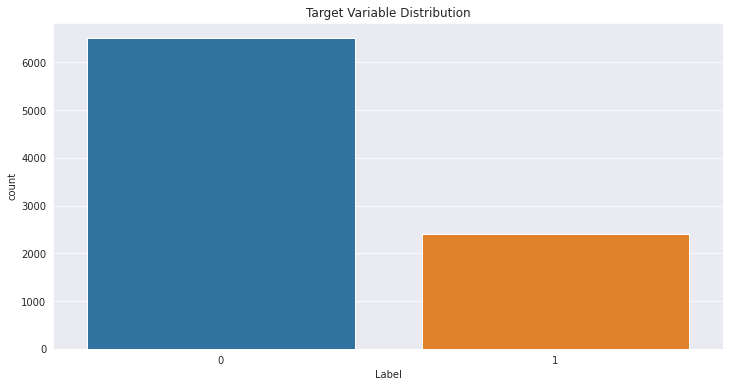

In [370]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = data_impute)
plt.title('Target Variable Distribution')
plt.show()

In [371]:
X = data_impute.drop(columns='Label')
y = data_impute['Label']

y

0       1
1       0
2       0
3       0
4       1
       ..
8903    1
8904    0
8905    0
8906    0
8907    0
Name: Label, Length: 8908, dtype: int64

In [372]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_res,y_res = rus.fit_resample(X,y)
x = pd.DataFrame(X_res)
y = pd.DataFrame(y_res)

data_impute = pd.concat([x,y], axis = 1)
data_impute

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,...,Pages Input/sec,Page Errors/sec,Confirmed byte radius,I/O Operation/Byte,CPU Utilisation,Disk Usage,I/O Bytes per Subprocess,Page Fault rate,Network Activity,Label
0,ID_4M6SB5X39U,31.369916,127228.251100,33.0,0.523750,18.628412,0.133378,498.410066,6786.610746,3.512278,...,0.0,12026.974340,27.450832,0.000247,0.000118,18.761790,3855.401548,0.000070,7294.979677,0
1,ID_XE7D6O957O,6.732898,1367.022771,27.0,0.000000,0.555520,0.000000,90.994120,193.343061,0.977715,...,0.0,342.044563,28.266598,0.004925,0.000000,0.555520,50.630473,0.000000,286.248169,0
2,ID_QUGZ2HASMR,0.000000,0.000000,26.0,0.000000,0.644667,0.000000,39.146852,18.272977,0.422368,...,0.0,258.066894,22.133387,0.003149,0.000000,0.644667,0.000000,0.000000,58.108955,0
3,ID_J1YW0CSUZ3,19.304867,18927.389400,27.0,0.000000,0.821956,0.000000,38.454229,25.769443,0.444301,...,0.0,443.612078,28.611256,0.001020,0.000000,0.821956,701.014422,0.000000,65.045629,0
4,ID_POOU5BQ0AX,9.088815,2764.244086,27.0,0.104166,1.355544,0.000000,70.288315,141.865508,0.733327,...,0.0,345.886063,28.158915,0.003288,0.000024,1.355544,102.379411,0.000000,213.553811,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,ID_AKGXY41K1H,47.827710,73713.107310,33.0,0.417567,31.901310,3.176802,2366.917285,48359.121000,17.727887,...,0.0,14595.093910,25.390180,0.000649,0.000094,35.078112,2233.730525,0.000067,50779.532962,1
4804,ID_8ABPXYH94Q,5.206184,1206.473153,25.0,0.000000,1.201427,0.000000,232.616322,5503.457480,2.803330,...,0.0,354.741392,31.260762,0.004315,0.000000,1.201427,48.258926,0.000000,5742.881889,1
4805,ID_3X7WT3VBKL,19.030549,19895.240670,32.0,0.156090,5.694180,0.024974,1982.973263,951.902089,2.747192,...,0.0,2000.105752,30.391505,0.000957,0.000035,5.719155,621.726271,0.000062,2939.970145,1
4806,ID_9O3VPYAFMZ,4.998256,1087.620442,27.0,0.034710,0.444289,0.000000,8.241568,19.304374,0.155501,...,0.0,363.251010,22.952369,0.004596,0.000008,0.444289,40.282239,0.000000,27.856945,1


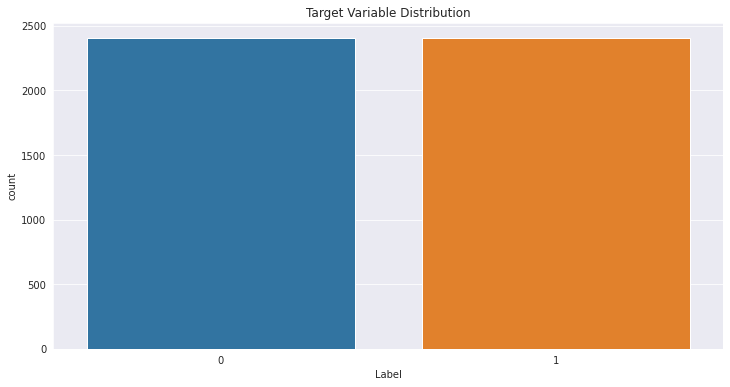

In [373]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = data_impute)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset

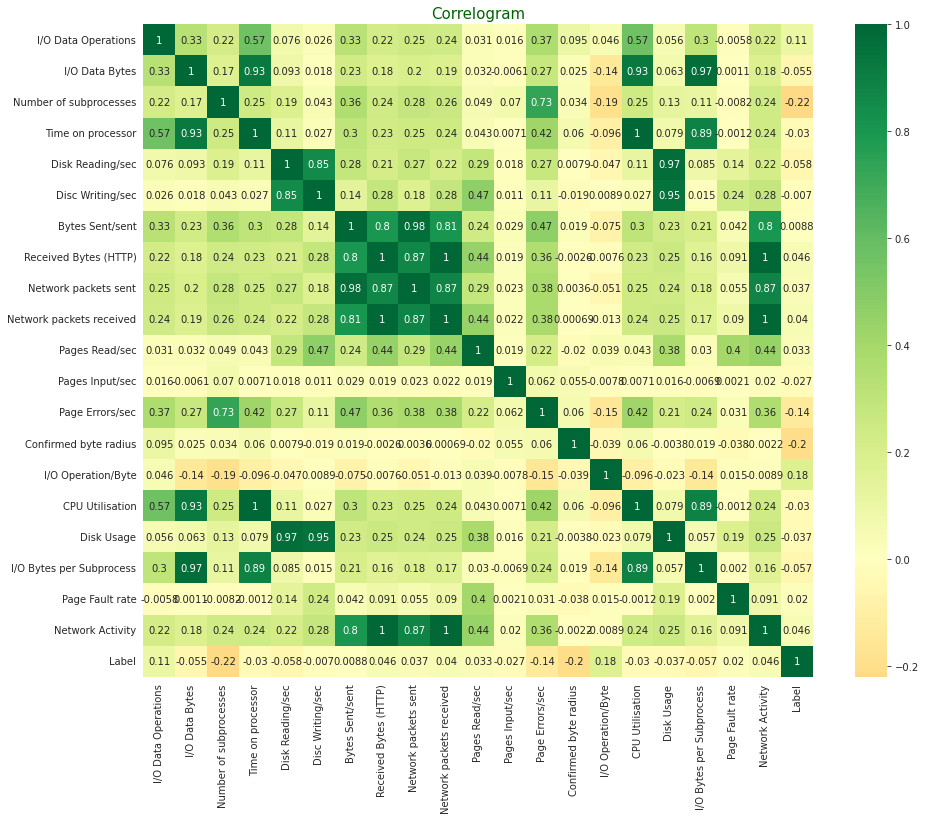

In [374]:
# Plotting a heatmap to show correlations between variables
corr = data_impute.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target

<a name="Preprocess"></a>
## 6. Modeling

In [387]:
#scale numerical features for logistic model
#features = data_impute.drop(columns=['ID','Label']).columns
features = data_impute.drop(columns=['ID','I/O Operation/Byte','Label','CPU Utilisation','I/O Bytes per Subprocess','Disk Usage','Page Fault rate','Network Activity']).columns
target = 'Label'

features
# define standard scaler
scaler = StandardScaler()

# transform data
data_impute[features] = scaler.fit_transform(data_impute[features])
data_impute[features] = scaler.transform(data_impute[features])

In [388]:
#features = train.drop(columns=['ID','Label','I/O Operation/Byte','CPU Utilisation','I/O Bytes per Subprocess','Disk Usage','Page Fault rate','Network Activity']).columns

In [389]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(data_impute[features], 
                                                    data_impute[target].to_frame(),
                                                    stratify=data_impute[target], #to account for class imbalance
                                                    test_size=0.3,
                                                    random_state=SEED)

In [390]:
#fit logistic regression model on rrain data
model = LogisticRegression()
model.fit(X_train, y_train['Label'])

#make predictions on validation set
preds = model.predict(X_test)

In [391]:
#check performance of the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       721
           1       0.69      0.80      0.74       722

    accuracy                           0.72      1443
   macro avg       0.72      0.72      0.72      1443
weighted avg       0.72      0.72      0.72      1443



In [392]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_test,preds)
#print(classification_report(y_test, bal_acc))
bal_acc

0.717890472220408

In [401]:
#make predictions on test set
test['Target'] = model.predict(test[features])

In [400]:
sub = test[['ID', 'Target']]

In [399]:
sub.head(10)

,ID,Target
0,ID_L7RNFK5JC9,1
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0
5,ID_64UNYP0YRV,0
6,ID_95RLFN8W6P,1
7,ID_U9FLCVO4L7,0
8,ID_MNP4PY97YF,0
9,ID_LVPPC2KF9A,1


In [402]:
sub.to_csv('UHA_23_crypto.csv', index=False)

In [385]:
train.nunique()

ID                          8908
I/O Data Operations         6001
 I/O Data Bytes             5977
Number of subprocesses        36
Time on processor           3702
Disk Reading/sec            7397
Disc Writing/sec            2144
Bytes Sent/sent             7397
Received Bytes (HTTP)       7397
Network packets sent        7395
Network packets received    7394
Pages Read/sec              4258
Pages Input/sec               26
Page Errors/sec             7397
Confirmed byte radius       7309
Label                          2
I/O Operation/Byte          6081
CPU Utilisation             3702
Disk Usage                  7397
I/O Bytes per Subprocess    6043
Page Fault rate             4312
Network Activity            7397
dtype: int64